# Quantum Approximate Optimization Algorithm (QAOA)

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# import math lib
from math import pi
# Loading your IBM Q account(s)
IBMQ.load_accounts()


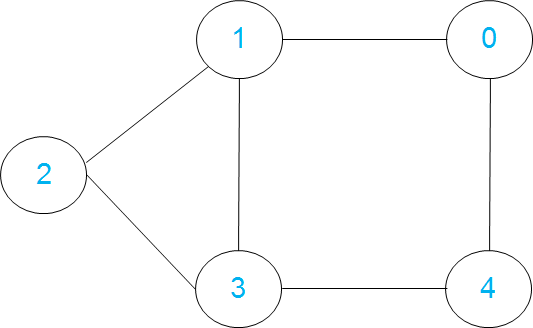

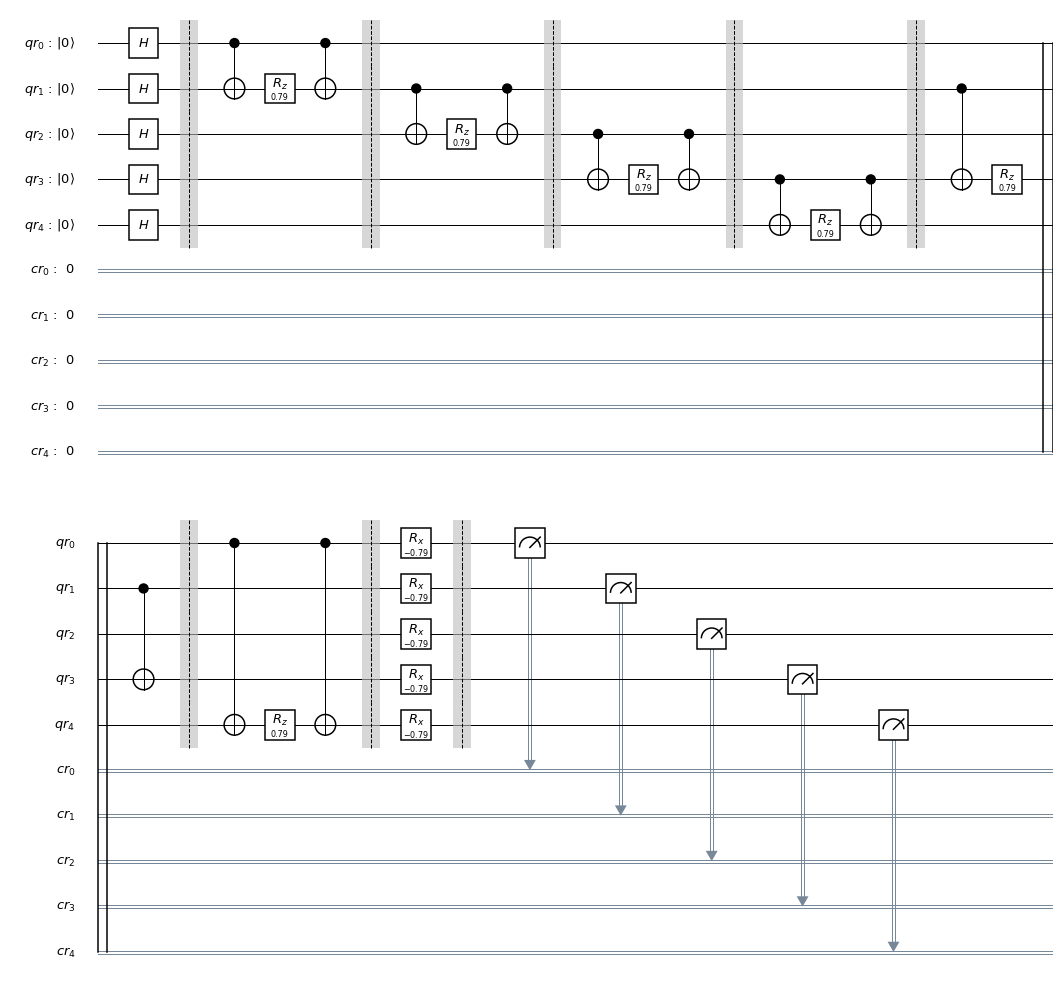

In [2]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')
qr = QuantumRegister(5, name="qr")
# create Quantum Register called "cr" with 4 qubits
cr = ClassicalRegister(5, name="cr")
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="QAOA_Algorithm")     

qc.h(qr) 
qc.barrier()

qc.cx(qr[0],qr[1])
qc.rz(pi/4, qr[1])
qc.cx(qr[0],qr[1])
qc.barrier()

qc.cx(qr[1],qr[2])
qc.rz(pi/4, qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()

qc.cx(qr[2],qr[3])
qc.rz(pi/4, qr[3])
qc.cx(qr[2],qr[3])
qc.barrier()

qc.cx(qr[3],qr[4])
qc.rz(pi/4, qr[4])
qc.cx(qr[3],qr[4])
qc.barrier()

qc.cx(qr[1],qr[3])
qc.rz(pi/4, qr[3])
qc.cx(qr[1],qr[3])
qc.barrier()

qc.cx(qr[0],qr[4])
qc.rz(pi/4, qr[4])
qc.cx(qr[0],qr[4])
qc.barrier()

qc.rx(-pi/4, qr)
qc.barrier()

# To measure the whole quantum register
qc.measure(qr, cr)
circuit_drawer(qc, output='mpl')



{'11010': 342, '11110': 93, '00101': 314, '10100': 321, '10111': 61, '01111': 95, '11001': 87, '10101': 565, '00011': 220, '11111': 41, '01000': 60, '10000': 100, '00100': 45, '01001': 848, '00010': 69, '10110': 866, '00000': 61, '01010': 579, '01011': 342, '10001': 24, '00001': 98, '01110': 22, '10011': 87, '11100': 262, '11011': 48, '10010': 830, '11101': 78, '01100': 92, '01101': 809, '00110': 87, '11000': 222, '00111': 232}


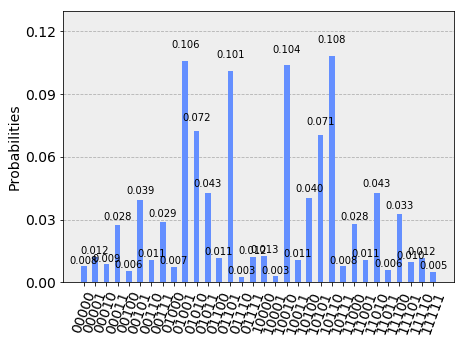

In [3]:
job = execute(qc, backend=backend, shots=8000,)
result = job.result()

    
print(result.get_counts(qc))
plot_histogram(result.get_counts())

In [4]:
import operator
temp = result.get_counts(qc)
sorted_result = sorted(temp.items(), key=operator.itemgetter(1))

In [5]:
sorted_result

[('01110', 22),
 ('10001', 24),
 ('11111', 41),
 ('00100', 45),
 ('11011', 48),
 ('01000', 60),
 ('10111', 61),
 ('00000', 61),
 ('00010', 69),
 ('11101', 78),
 ('11001', 87),
 ('10011', 87),
 ('00110', 87),
 ('01100', 92),
 ('11110', 93),
 ('01111', 95),
 ('00001', 98),
 ('10000', 100),
 ('00011', 220),
 ('11000', 222),
 ('00111', 232),
 ('11100', 262),
 ('00101', 314),
 ('10100', 321),
 ('11010', 342),
 ('01011', 342),
 ('10101', 565),
 ('01010', 579),
 ('01101', 809),
 ('10010', 830),
 ('01001', 848),
 ('10110', 866)]